# Algoritmo de búsqueda $A^*$

El algoritmo de $A^*$ es el algoritmo más reconocido dentro de la búsqueda heurística. Este algoritmo incorpora una heurística y la combina con la función de costo para buscar encontrar la solución óptima al problema. A diferencia del algoritmo de primero mejor ambicioso, el tomar en cuenta el costo va a permitir que la solución si sea óptima, siempre y cuando se cumplan la condición de que la heurística sea admisible.

### Creación del problema

Nuestro problema será un laberinto con tráfico. En este caso, utilizamos el mismo mapa que hemos utilizado con el problema que previamente resolvió el algoritmo de primer mejor ambicioso. Esto nos permitirá comparar los resultados obtenidos.

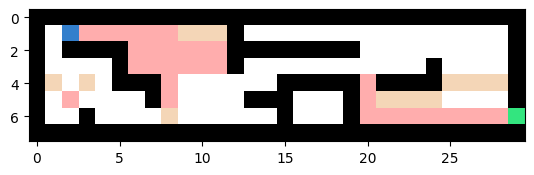

In [1]:
import numpy as np
from maze_simulator import TrafficMaze

mapa = """
##############################
# o------...#                #
# ####------########         #
#    #------#           #    #
#. . ###-      #####-####....#
# -    #-    ###   #-....    #
#  #    .      #   #---------x
##############################
"""

ent = TrafficMaze(mapa)
ent.draw()

## Heurística

La heurística que elegimos será la misma que para el método de primero mejor ambicioso. Es decir, tomamos como heurística la distancia euclideana o distancia en linea recta, definida como:

$$h(n) = \sqrt{(x_n - x_{goal})^2 + (y_n-y_{goal})^2}$$

Esta heurística es admisible pues nunca sobre estima el costo óptimo del camino. Esto es fácil de ver como la heurística asume un camino recto desde el punto en que se encuentra el agente, hasta la meta; mientras que el camino óptimo se enfrenta a los obstáculos y al tráfico. Entonces, podemos garantizar que:

$$h(n) < C^*$$

Donde $C^*$ es el costo del camino óptimo. Ya que la heurística es admisible, podemos garantizar que el algoritmo encontrará una solución óptima.

In [2]:
def h(state, goal,p=3):
    """Heurística euclideana"""
    x1,y1 = state
    x2,y2 = goal
    #Obtiene distancia euclideana
    dist = ((x2-x1)**p + (y2-y1)**p)**(1/p)
    
    return dist.real

## Creación del algoritmo $A^*$

Para crear el algoritmo necesitamos utilizar una pila de prioridad que tome el nodo con menor costo y menor heurística. Definimos nuestra pila de prioridad de la misma forma que para el caso de primero mejor ambicioso.

In [3]:
class PriorityQueue(object):
    """Clase de una cola de prioridad en los problemas de búsqueda."""
    def __init__(self,f=lambda x: 1):
        self.queue = []
        self.f = f
  
    def __str__(self):
        return ' '.join([str(q) for q in self.queue])
  
    def isEmpty(self):
        return self.queue == []
  
    def push(self, element):
        """Agrega elementos a la pila"""
        self.queue.append(element)
  
    def pop(self):
        """Saca de la pila el elemento con mayor valor f."""
        #Encuentra el elemento máximo en base al costo
        min_element = np.argmin([element.f for element in self.queue])
        #Guarda el elemento máximo
        item = self.queue[min_element]
        #Borra este elemento de la cola
        del self.queue[min_element]
    
        return item

### Nodo y expansión

Los nodos tendrán la misma estructura que hemos venido utilizando, guardando el costo y la función de prioridad $f$. Pero en el algoritmo de $A^*$ esta función tomará en cuenta tanto el costo como la heurística. Podemos ver que entonces la función $f$ estará dada como:

$$f(n) = g(n) + h(n)$$

Donde $g(n)$ es el costo del camino desde el nodo inicial hasta el nodo actual. Entonces, al crear el nuevo nodo tomaremos en cuenta esta forma de obtener los valores de $f$.

In [4]:
class Node(object):
    """Clase para crear nodos con sus atributos."""
    def __init__(self):
        self.state = (0,0)
        self.parent = None 
        self.action = None
        self.cost = 0
        self.f = 0
        
    def __str__(self):
        if self.parent == None:
            return "State: {}".format(self.state)
        else:
            return "State: {}, Action: {}, Parent: {}".format(self.state,self.action,self.parent.state)   
            
def expand(problem, node):
    """Función para expandir los nodos dado el problema"""
    s = node.state 
    for action in problem.actions(s):
        #Aplica la función de resultado
        new_s = problem.result(s, action)
        #Crea el nuevo nodo
        new_node,new_node.state,new_node.parent,new_node.action = Node(),new_s,node,action
        #Agrega el costo
        new_node.cost = node.cost + problem.cost(s,action,new_s)
        #Agrega sólo la heurística al nodo
        new_node.f = new_node.cost + h(new_s, problem.goal)
        
        yield new_node

## Algoritmo $A^*$

El algoritmo de $A^*$ es similar a primero mejor ambicioso y el algoritmo de Dijkstra, extendiendo estos al incorporar tanto la función de costo como a la función heurística. Al igual que el algoritmo de primero mejor ambicioso utiliza un Late-Goal Test para revisar si el nodo es final.

In [5]:
def AStar(problem):
    """Algoritmo A* para generar el camino más apto"""
    #Almacenamiento de nodos
    nodes = []
    #Nodo inicial
    node = Node()
    node.state = problem.initial
    #Frontera con cola de prioridad
    frontier = PriorityQueue()
    frontier.push(node)
    #Nodos alcanzados
    reached = {problem.initial:node}

    #Mientras la frontera no esté vacía
    while frontier.isEmpty() == False:
        #Pop en frontera
        node = frontier.pop()
        #Guarda el nodo en la lista
        nodes.append(node)
        #Actualiza el estado del problema
        problem.state = node.state

        #Si llega a un estado final se detiene 
        #y regresa el camino de nodos
        if problem.state == problem.goal:
            return nodes

        #Expande el nodo actual
        expansion = expand(problem, node)
        for child in expansion:
            #Guarda estado de los hijos
            state = child.state
            #Guarda los hijos no alcanzados o que tengan menor costo
            if state not in reached.keys() or child.f < reached[state].f:
                reached[state] = child
                frontier.push(child)

    #Si no logra llegar a un nodo final
    #El algoritmo regresa mensaje de error
    return "No se ha logrado llegar a un estado final."

### Aplicación del algoritmo

Ahora podemos aplicar el algoritmo de $A^*$ al problema del laberinto con tráfico tal como lo hemos definido.

In [6]:
tree = AStar(ent)

Finalmente, vemos la solución propuesta por el algoritmo:

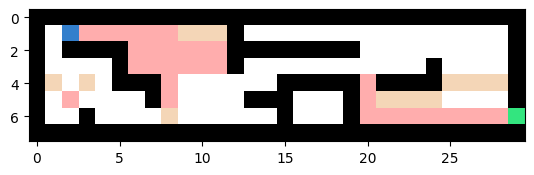

Solución


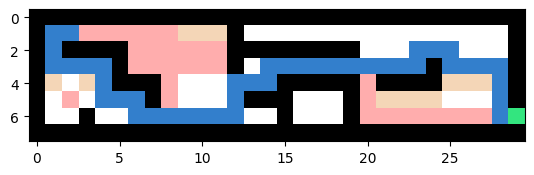

Costo total: 45


In [7]:
def get_path(search_tree, root):
    """Recupera la solución."""
    leaf = search_tree[::-1][0]
    parent = leaf.parent
    path = [leaf, parent]
    while parent.state != root:
        parent = parent.parent
        path.append(parent)
        
    return path[::-1]

ent.draw()
#Visualiza la solución
prev_s = ent.initial
for n in get_path(tree, ent.initial):
    ent.move(prev_s, n.state)
    prev_s = n.state

print('Solución')
ent.draw()
print('Costo total: {}'.format(tree[-1].cost))

Podemos observar que la solución es distinta a la que se obtuvo con el algoritmo de primero mejor ambicioso; de hecho, la solución es un camino que en principio parece más largo, pero que evita precisamente las regiones de tráficos, minimizando así el costo total del camino.